In [153]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from scipy.stats import ttest_ind
from scipy.stats import zscore

### Read the input file and check the data dimension

In [154]:
df = pd.read_csv("german_credit.csv")
print(df.shape)
print(df.info())

(1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                    

In [155]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [156]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [157]:
#sns.pairplot(df, hue = 'default')

#### T test to find out features helping in prediction default values  and removing those which are not helping in prediction

In [158]:
df_obj_col = ['account_check_status','credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex' ,
             'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker', 'default'] 
df_int_col = ['duration_in_month', 'credit_amount', 'installment_as_income_perc', 'present_res_since', 'age',
              'credits_this_bank', 'people_under_maintenance']
df_obj_data = df[df_obj_col]
df_int_data = df[df_int_col]

In [159]:
df_1 = df[df.default == 1][df_int_col]
df_0 = df[df.default == 0][df_int_col]
print(df_1.shape)
print(df_0.shape)

(300, 7)
(700, 7)


#### ttest for numerical data 

In [160]:
for i in range(len(df_int_col)):
    ttest = ttest_ind(df_1.iloc[:,i],df_0.iloc[:,i])
    print(df_1.columns[i] + ': ' + str(format(ttest[1], 'f')))
    
# while doing the ttest on each column for data set having status = 1 (df_1) and status = 0 (df_0), we observe the p values 
# for few columns are > .05 value. it means that there means are same and is not helping in predicting default value. 
# columns are present_res_since, people_under_maintenannce, credits_this_bank. so removing these 3 columns from df. 

remov_cols = ['present_res_since', 'credits_this_bank', 'people_under_maintenance']
df_int_data.drop(remov_cols,  axis = 1, inplace = True)
df_int_data.shape

duration_in_month: 0.000000
credit_amount: 0.000001
installment_as_income_perc: 0.022035
present_res_since: 0.925337
age: 0.003925
credits_this_bank: 0.148420
people_under_maintenance: 0.924141


(1000, 4)

#### ttest for categorical data after converting them to dummies data 

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [161]:
dummies = pd.get_dummies(df[df_obj_col])
dummies.shape

(1000, 55)

In [162]:
df_1 = dummies[dummies.default == 1]
df_0 = dummies[dummies.default == 0]
print(df_1.shape)
print(df_0.shape)

(300, 55)
(700, 55)


In [163]:
col = {}
l = len(dummies.columns) - 1
for i in range(l):
    ttest = ttest_ind(df_1.iloc[:,i],df_0.iloc[:,i])
    col[df_1.columns[i]] = str(format(ttest[1], 'f'))
    
colu = []
for k,v in col.items():
    if float(v) > .05:
        colu.append(k)

# while doing the ttest on each column for data set having status = 1 (df_1) and status = 0 (df_0), we observe the p values 
# for few columns are > .05 value. it means that there means are same and is not helping in predicting default value. 

dummies.drop(colu,  axis = 1, inplace = True)
dummies.shape

(1000, 29)

#### combining numerical and dummies data to one dataframe 

In [164]:
final_df = pd.concat([df_int_data, dummies], axis=1)

In [165]:
final_df.shape

(1000, 33)

In [166]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
age                                                                           1000 non-null int64
default                                                                       1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_check_status_< 0 DM                                                   1000 non-null uint8
account_check_status_no checking account                                      1000 non-null uint8
credit_history_all credits at this bank paid back duly                        1000 non-null uint8
credit_histo

#### corr to find the correlated feature and removing that feature. 
### Check for highly correlated variables but don't required any treatment for this use case

In [195]:
df_corr = final_df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape),1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
print(final_df.shape)
final_df.drop(final_df[to_drop], axis = 1, inplace = True)
final_df.shape

[]
(1000, 32)


(1000, 32)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
df50 = final_df.sample(frac =.50, random_state= 4) 
df50.shape

(500, 32)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [198]:
df_X = df50.drop('default', axis = 1)
df_y = df50.default

In [199]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = .70, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 31)
(350, 31)
(150,)
(350,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [202]:
rfmodel = rf.fit(X_train,y_train)

In [206]:
predicted_labels = rf.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [205]:
print("test score is  :  " + str(rfmodel.score(X_test, y_test)))
print("train score is :  " + str(rfmodel.score(X_train, y_train)))

test score is  :  0.7428571428571429
train score is :  1.0


In [211]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels))

,0,1
0,220,22
1,68,40


### Q6 Show the list of the features importance( 1 Marks)

In [229]:
import pandas as pd
feature_importances = pd.DataFrame(rfmodel.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [230]:
feature_importances

,importance
credit_amount,0.144631
age,0.136115
duration_in_month,0.132093
installment_as_income_perc,0.045702
purpose_car (new),0.033234
account_check_status_no checking account,0.030944
present_emp_since_... < 1 year,0.028820
other_installment_plans_bank,0.028066
housing_own,0.027435
purpose_domestic appliances,0.026804


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [215]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [220]:
# Use below values
num_folds = 10
seed = 77

In [221]:
#Validate the Random Forest model build above using k fold

In [222]:
scores = cross_val_score(rfmodel, X_train, y_train, cv=num_folds)

In [223]:
#Calculate Mean score

In [224]:
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.625      0.8125     0.625      0.86666667 0.66666667 0.73333333
 0.73333333 0.64285714 0.64285714 0.64285714] [0.625      0.8125     0.625      0.86666667 0.66666667 0.73333333
 0.73333333 0.64285714 0.64285714 0.64285714]
Average score: 0.6991071428571429


In [ ]:
# Calculate score standard deviation using std()

In [226]:
np.std(scores)

0.08050174379458033

# Q8 Print the confusion matrix( 1 Marks)

In [231]:
from sklearn import metrics

pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels))

,0,1
0,220,22
1,68,40


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

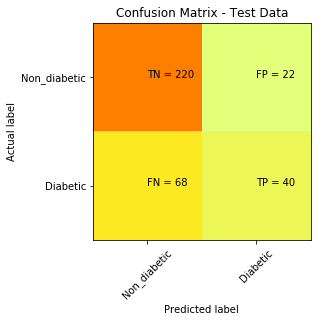

In [233]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, predicted_labels)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [234]:
TP = 40
TN = 220
FP = 22
FN = 68

In [241]:
### senstivity
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, predicted_labels))

0.2571428571428571
0.2571428571428571


In [242]:
### Specificity
print(TN / float(TN + FP))

0.9090909090909091


In [243]:
## Flase postive rate 
print(FP / float(TN + FP))

0.09090909090909091


In [245]:
#### precision
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, predicted_labels))

0.6451612903225806
0.6451612903225806


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [249]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc

In [246]:
y_pred_prob = rfmodel.predict_proba(X_test)[:, 1]

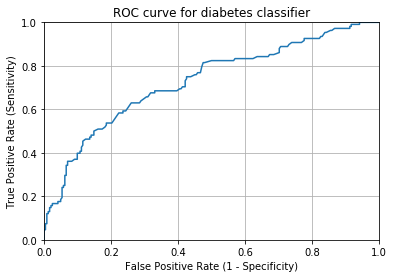

In [247]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [251]:
roc_auc2 = auc(fpr, tpr)
roc_auc2

0.7283631772268135

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [252]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [255]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfmodel.fit(X_, y_)
    y_pred = rfmodel.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [256]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7162857142857142
Standard deviation:  0.015441793276424748
